In [1]:
import MDAnalysis as mda
import numpy as np
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt
from numpy import linalg as LA
import MDAnalysis.analysis.rdf as rdf_calc
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

# K26A_2980

In [2]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Startpoint/K26A_300us_298_0us/step6_6.gro", "/Users/k20098771/Data/2024/CGtoAA/Startpoint/K26A_300us_298_0us/step7_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
#Trajectory frames
u_1000 = u.trajectory[::100]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/61 [00:00<?, ?it/s]

61

In [4]:
#Select DAP12 and TREM2
DAP12_A = u.select_atoms('index 0:495 and name CA') #DAP12 chain A
DAP12_B = u.select_atoms('index 496:991 and name CA') #DAP12 chain B
TREM2 = u.select_atoms('index 992:1704 and name CA') #TREM2
print(np.unique(DAP12_A.resids))
print(np.unique(DAP12_B.resids))
print(np.unique(TREM2.resids))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


# K26A Mix all

In [35]:
# Load all six contact maps
contact_maps = [np.load(f'./K26A_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (46, 33)
[[3 0 8 ... 0 0 0]
 [3 0 6 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 3 4]
 [0 0 0 ... 0 0 5]
 [0 0 0 ... 0 5 7]]


In [36]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

In [37]:
df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0,1
0,33,33
1,26,27


In [38]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

   TREM2  DAP12
0    182     47
1    183     54
2    193     58
3    194     61
4    194     62
5    197     62
6    198     67
   TREM2  DAP12
0    194     61
1    194     62


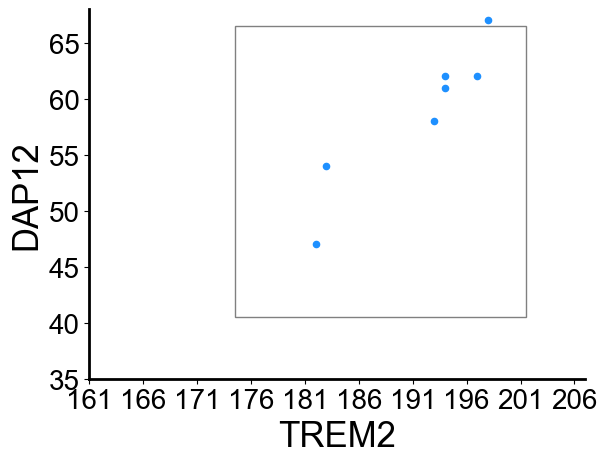

In [39]:
import matplotlib.patches as patches

df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35



# Plotting the DataFrame
ax = df.plot(x='TREM2', y='DAP12', kind='scatter', color='dodgerblue')
# ax = df_01.plot(x='TREM2', y='DAP12', kind='scatter', color='red')
# ax = df_02.plot(x='TREM2', y='DAP12', kind='scatter', color='green')
# ax = df_03.plot(x='TREM2', y='DAP12', kind='scatter', color='yellow')
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add the rectangle
#rect = patches.Rectangle((25.5, 16.5), width=1, height=5, fill=False, edgecolor='red') #DxxxT
#ax.add_patch(rect)

rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=27, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Adjusting the x-axis ticks
x_ticks = np.arange(161, 46+161, 5)
y_ticks = np.arange(35, 33+35, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0+161,46+161])
plt.ylim([0+35,33+35])

# Changing the font name of x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticks(), fontsize=20, fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontsize=20, fontname='Arial')

ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

#Saving the plot as an image file
# plt.savefig("/Users/k20098771/Data/Figures/K26A_contact_map_merged_60.eps", dpi=800, format='eps',bbox_inches="tight")


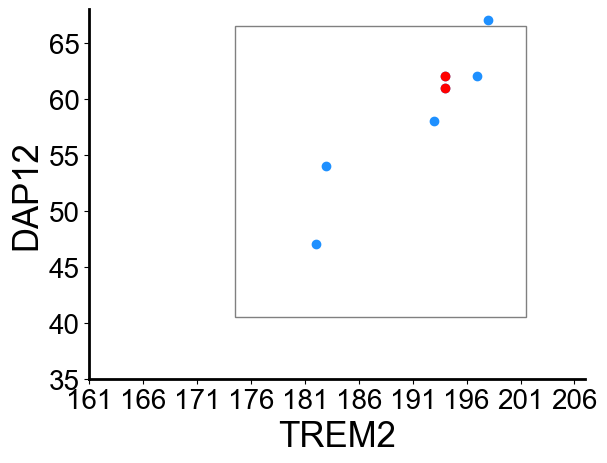

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=27, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 207+1, 5)
y_ticks = np.arange(35, 68+1, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim([161, 207])
ax.set_ylim([35, 68])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
# Add legend
# ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/K26A_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")


# K26X Mix all

In [11]:
# Load all six contact maps
contact_maps = [np.load(f'./K26X_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('K26X_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (25, 33)
[[  7  12   0   1   0   0   0   6   5   0  13  71  21   2   4 111   0   0
    2   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   7   4   0   0   0   0   9   0   0   4  66   0   1   5  52   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   7  29   0   9   0   1  28   5   0   3  25   0   0   4  15   0   0
   61   2   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   3   1   0   0   6   0  31  22   0  20  68   0   0  43   7   0   0
   12   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0  42   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 25  16   2   0   0   1   0   0  23   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 

In [12]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0,1
0,24,24
1,27,31


In [13]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

   TREM2  DAP12
0    161     50
1    172     47
2    173     54
3    176     51
4    177     57
5    180     61
6    185     62
7    185     65
8    185     66
   TREM2  DAP12
0    185     62
1    185     66


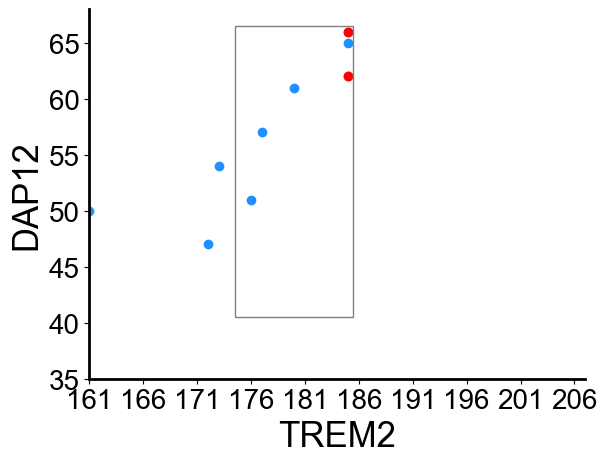

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=11, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 207+1, 5)
y_ticks = np.arange(35, 68+1, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim([161, 207])
ax.set_ylim([35, 68])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
# ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/K26X_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")


# W34A Mix all

In [15]:
# Load all six contact maps
contact_maps = [np.load(f'./W34A_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('W34A_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (46, 33)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1 10  1]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  2 10  1]]


In [16]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0,1,2,3,4,5
0,25,26,29,33,33,37
1,15,22,19,23,26,27


In [17]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

    TREM2  DAP12
0     170     42
1     183     53
2     186     50
3     187     53
4     187     57
5     190     54
6     190     57
7     190     58
8     191     57
9     191     61
10    193     57
11    193     61
12    194     58
13    194     61
14    194     62
15    197     61
16    198     62
17    198     65
18    198     66
   TREM2  DAP12
0    186     50
1    187     57
2    190     54
3    194     58
4    194     61
5    198     62


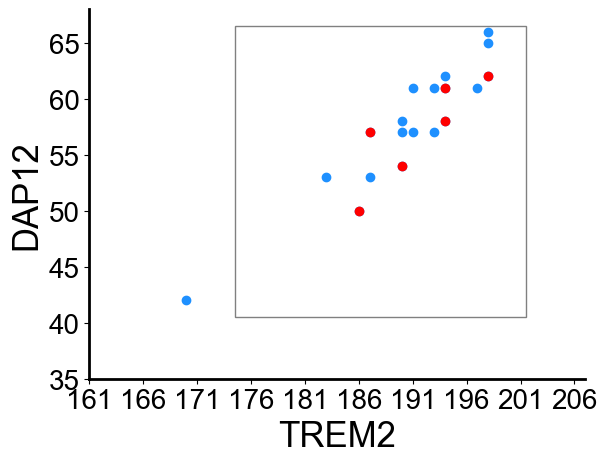

In [18]:
# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=27, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 207+1, 5)
y_ticks = np.arange(35, 68+1, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim([161, 207])
ax.set_ylim([35, 68])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
# ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/W34A_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")


# W34X Mix all

In [19]:
# Load all six contact maps
contact_maps = [np.load(f'./W34X_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('W34X_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (33, 33)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  1]
 [ 0  0  0 ...  0 42  7]
 [ 0  0  0 ...  4 46 13]]


In [20]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0
0,17
1,19


In [21]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

   TREM2  DAP12
0    177     54
1    178     54
2    178     57
3    181     54
4    182     61
5    185     58
6    185     62
   TREM2  DAP12
0    178     54


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


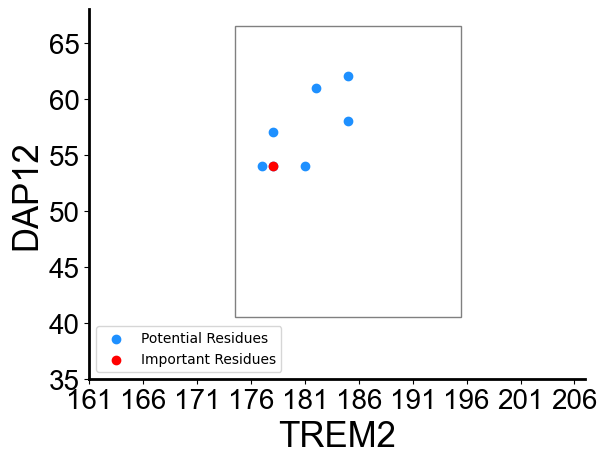

In [22]:
# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=21, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 207+1, 5)
y_ticks = np.arange(35, 68+1, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim([161, 207])
ax.set_ylim([35, 68])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/W34X_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")

# FL_219 Mix all

In [23]:
# Load all six contact maps
contact_maps = [np.load(f'./FL_219_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('FL_219_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (48, 33)
[[1 3 4 ... 0 0 0]
 [0 3 3 ... 0 0 0]
 [7 5 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 8]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 4 1]]


In [24]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0
0,37
1,23


In [25]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

   TREM2  DAP12
0    191     54
1    194     54
2    195     57
3    198     58
4    198     61
5    199     61
6    200     66
7    201     66
8    202     66
   TREM2  DAP12
0    198     58


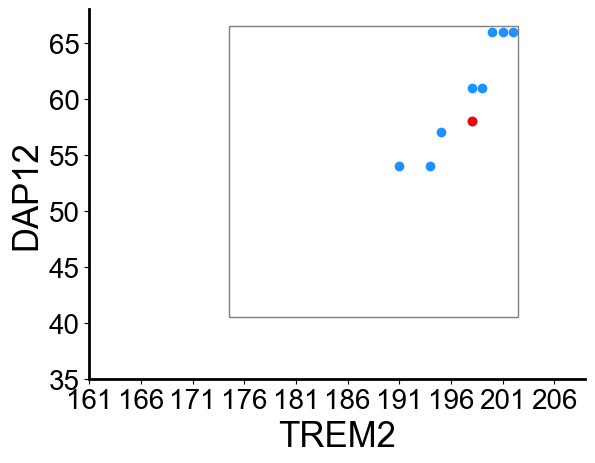

In [26]:
# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=28, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 48+161, 5)
y_ticks = np.arange(35, 33+35, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0+161,48+161])
plt.ylim([0+35,33+35])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
# ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/FL_219_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")

# W31A_219 Mix all

In [27]:
# Load all six contact maps
contact_maps = [np.load(f'./W31A_219_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('W31A_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (48, 33)
[[ 0  3  0 ...  0  0  0]
 [ 2  5  9 ...  0  0  0]
 [ 9 23  5 ...  0  0  0]
 ...
 [ 0  0  0 ... 17 10 13]
 [ 0  0  0 ...  0 11 15]
 [ 0  0  0 ...  1  7  7]]


In [28]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

,0,1
0,37,41
1,23,27


In [29]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

   TREM2  DAP12
0    167     50
1    195     57
2    197     55
3    198     57
4    198     58
5    198     61
6    198     62
7    201     62
8    202     62
9    202     66
   TREM2  DAP12
0    198     58
1    202     62


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


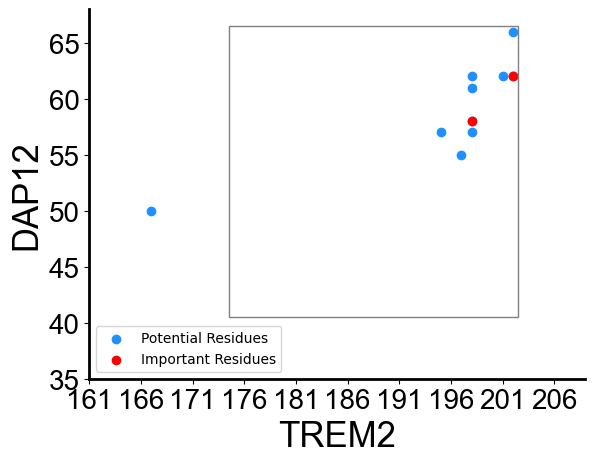

In [30]:
# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=28, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 48+161, 5)
y_ticks = np.arange(35, 33+35, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0+161,48+161])
plt.ylim([0+35,33+35])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/W31A_219_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")

# W31X_219 Mix all

In [31]:
# Load all six contact maps
contact_maps = [np.load(f'./W31X_219_contact_map_0{i}.npy', allow_pickle=True) for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('W31X_merged_contact_map.npy', merged_contact_map)

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Merged contact map shape: (30, 33)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 55 21 11 27 61 63]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  9  8 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  4  6  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 12  5  0 13 15 22]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  2 10  0  0  7  7 17]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  6  2  0  1  2 13]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  2  0  0  2  8 28]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  8  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0 

In [32]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)
# chart_01=np.where(prob>=0.7)
# chart_02=np.where(prob>=0.8)
chart_03=np.where(prob>=0.9)

df = pd.DataFrame(chart)
# df_01 = pd.DataFrame(chart_01)
# df_02 = pd.DataFrame(chart_02)
df_03 = pd.DataFrame(chart_03)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df
# df_01
# df_02
df_03

""
0
1


In [33]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161})
# df_01['DAP12'] = chart_01[1]+35 # Add a column 'D' with values from chartA[1]
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161})
# df_02['DAP12'] = chart_02[1]+35 # Add a column 'D' with values from chartA[1]
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161})
df_03['DAP12'] = chart_03[1]+35 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)
# print(df_01)
# print(df_02)
print(df_03)

Empty DataFrame
Columns: [TREM2, DAP12]
Index: []
Empty DataFrame
Columns: [TREM2, DAP12]
Index: []


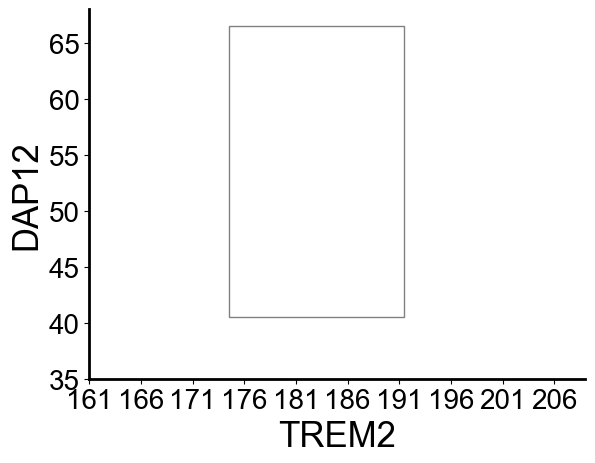

In [34]:
# Create DataFrames
df = pd.DataFrame({'TREM2': chart[0]+161, 'DAP12': chart[1]+35})
# df_01 = pd.DataFrame({'TREM2': chart_01[0]+161, 'DAP12': chart_01[1]+35})
# df_02 = pd.DataFrame({'TREM2': chart_02[0]+161, 'DAP12': chart_02[1]+35})
df_03 = pd.DataFrame({'TREM2': chart_03[0]+161, 'DAP12': chart_03[1]+35})

# Create a single figure and axis
fig, ax = plt.subplots()

# Plot each DataFrame using matplotlib directly
ax.scatter(df['TREM2'], df['DAP12'], color='dodgerblue', label='Potential Residues')
# ax.scatter(df_01['TREM2'], df_01['DAP12'], color='red', label='70%')
# ax.scatter(df_02['TREM2'], df_02['DAP12'], color='green', label='80%')
ax.scatter(df_03['TREM2'], df_03['DAP12'], color='red', label='Important Residues')

# Labels and ticks
ax.set_xlabel('TREM2', fontsize=25, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=25, fontname='Arial')

# Add rectangle
rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=17, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Set axis ticks and limits
x_ticks = np.arange(161, 48+161, 5)
y_ticks = np.arange(35, 33+35, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0+161,48+161])
plt.ylim([0+35,33+35])
ax.set_xticklabels(x_ticks, fontsize=20, fontname='Arial')
ax.set_yticklabels(y_ticks, fontsize=20, fontname='Arial')

# Remove top/right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add legend
# ax.legend()

# Save figure
plt.savefig("/Users/k20098771/Data/Figures/W31X_219_contact_map_merged_60_90.eps", dpi=800, format='eps', bbox_inches="tight")